# Objective:
### This Python notebook is covering the following:

   1. Data exploration on Neighbourhoods spread with prices and counts ,
   2. Data exploration on Kitchen quality with prices of the dataset,
   3. Exploring correlation on selected columns and then using that to further select non-multicollinear factors to visualise the correlation amongst them,
   4. Supervised classification of building type by using selected relevant columns and reviewing its accuracy,
   5. Unsupervised clustering techniques (2) to segment residents on the basis of their house price and house living area.

In [1]:
# importing libraries
import os
import io
import warnings

import numpy as np
import scipy as sp
import pandas as pd
import sklearn as sk

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

warnings.simplefilter(action='ignore', category=FutureWarning)

## Data Setup

In [2]:
house = pd.read_csv('Shortlisted Train - train.csv')
display(house.head(10))

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,...,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageCars,PavedDrive,YrSold,SaleCondition,SalePrice
0,60,RL,65.0,8450,Reg,CollgCr,1Fam,2Story,7,5,...,3,1,Gd,8,0,2,Y,2008,Normal,208500
1,20,RL,80.0,9600,Reg,Veenker,1Fam,1Story,6,8,...,3,1,TA,6,1,2,Y,2007,Normal,181500
2,60,RL,68.0,11250,IR1,CollgCr,1Fam,2Story,7,5,...,3,1,Gd,6,1,2,Y,2008,Normal,223500
3,70,RL,60.0,9550,IR1,Crawfor,1Fam,2Story,7,5,...,3,1,Gd,7,1,3,Y,2006,Abnorml,140000
4,60,RL,84.0,14260,IR1,NoRidge,1Fam,2Story,8,5,...,4,1,Gd,9,1,3,Y,2008,Normal,250000
5,50,RL,85.0,14115,IR1,Mitchel,1Fam,1.5Fin,5,5,...,1,1,TA,5,0,2,Y,2009,Normal,143000
6,20,RL,75.0,10084,Reg,Somerst,1Fam,1Story,8,5,...,3,1,Gd,7,1,2,Y,2007,Normal,307000
7,60,RL,NaN,10382,IR1,NWAmes,1Fam,2Story,7,6,...,3,1,TA,7,2,2,Y,2009,Normal,200000
8,50,RM,51.0,6120,Reg,OldTown,1Fam,1.5Fin,7,5,...,2,2,TA,8,2,2,Y,2008,Abnorml,129900
9,190,RL,50.0,7420,Reg,BrkSide,2fmCon,1.5Unf,5,6,...,2,2,TA,5,2,1,Y,2008,Normal,118000


In [3]:
house.columns[house.isna().any()]

Index(['LotFrontage', 'BsmtFinType1'], dtype='object')

In [4]:
house.isna().sum()

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
LotShape           0
Neighborhood       0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
Exterior1st        0
ExterQual          0
ExterCond          0
Foundation         0
BsmtFinType1      37
BsmtFinSF1         0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
TotalFullBath      0
TotalHalfBath      0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
KitchenQual        0
TotRmsAbvGrd       0
Fireplaces         0
GarageCars         0
PavedDrive         0
YrSold             0
SaleCondition      0
SalePrice          0
dtype: int64

In [5]:
house["LotFrontage"] = house["LotFrontage"].fillna(house["LotFrontage"].mean())
#BsmtFinType1, categorical basement feature, Na means there isn't a basement, so we can substitute with 'None'
house['BsmtFinType1'] = house['BsmtFinType1'].fillna('None')

In [6]:
house.describe(include='all')

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,...,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageCars,PavedDrive,YrSold,SaleCondition,SalePrice
count,1460.000000,1460,1460.000000,1460.000000,1460,1460,1460,1460,1460.000000,1460.000000,...,1460.000000,1460.000000,1460,1460.000000,1460.000000,1460.000000,1460,1460.000000,1460,1460.000000
unique,NaN,5,NaN,NaN,4,25,5,8,NaN,NaN,...,NaN,NaN,4,NaN,NaN,NaN,3,NaN,6,NaN
top,NaN,RL,NaN,NaN,Reg,NAmes,1Fam,1Story,NaN,NaN,...,NaN,NaN,TA,NaN,NaN,NaN,Y,NaN,Normal,NaN
freq,NaN,1151,NaN,NaN,925,225,1220,726,NaN,NaN,...,NaN,NaN,735,NaN,NaN,NaN,1340,NaN,1198,NaN
mean,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,6.099315,5.575342,...,2.866438,1.046575,NaN,6.517808,0.613014,1.767123,NaN,2007.815753,NaN,180921.195890
std,42.300571,NaN,22.024023,9981.264932,NaN,NaN,NaN,NaN,1.382997,1.112799,...,0.815778,0.220338,NaN,1.625393,0.644666,0.747315,NaN,1.328095,NaN,79442.502883
min,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,1.000000,1.000000,...,0.000000,0.000000,NaN,2.000000,0.000000,0.000000,NaN,2006.000000,NaN,34900.000000
25%,20.000000,NaN,60.000000,7553.500000,NaN,NaN,NaN,NaN,5.000000,5.000000,...,2.000000,1.000000,NaN,5.000000,0.000000,1.000000,NaN,2007.000000,NaN,129975.000000
50%,50.000000,NaN,70.049958,9478.500000,NaN,NaN,NaN,NaN,6.000000,5.000000,...,3.000000,1.000000,NaN,6.000000,1.000000,2.000000,NaN,2008.000000,NaN,163000.000000
75%,70.000000,NaN,79.000000,11601.500000,NaN,NaN,NaN,NaN,7.000000,6.000000,...,3.000000,1.000000,NaN,7.000000,1.000000,2.000000,NaN,2009.000000,NaN,214000.000000


In [7]:
house.columns[house.isna().any()]

Index([], dtype='object')

In [8]:
df = pd.DataFrame(house)
df.head(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,...,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageCars,PavedDrive,YrSold,SaleCondition,SalePrice
0,60,RL,65.0,8450,Reg,CollgCr,1Fam,2Story,7,5,...,3,1,Gd,8,0,2,Y,2008,Normal,208500
1,20,RL,80.0,9600,Reg,Veenker,1Fam,1Story,6,8,...,3,1,TA,6,1,2,Y,2007,Normal,181500
2,60,RL,68.0,11250,IR1,CollgCr,1Fam,2Story,7,5,...,3,1,Gd,6,1,2,Y,2008,Normal,223500
3,70,RL,60.0,9550,IR1,Crawfor,1Fam,2Story,7,5,...,3,1,Gd,7,1,3,Y,2006,Abnorml,140000
4,60,RL,84.0,14260,IR1,NoRidge,1Fam,2Story,8,5,...,4,1,Gd,9,1,3,Y,2008,Normal,250000


In [9]:
#Converting categorical variables and misinterpreted features

#MSSubClass
df['MSSubClass'] = df['MSSubClass'].apply(str)

#Year
df['YrSold'] = df['YrSold'].astype(str)

#YearBuilt
df['YearBuilt'] = df['YearBuilt'].astype(str)

#YearRemodAdd
df['YearRemodAdd'] = df['YearRemodAdd'].astype(str)

## Neighborhood viz

In [10]:
df.Neighborhood.unique()

array(['CollgCr', 'Veenker', 'Crawfor', 'NoRidge', 'Mitchel', 'Somerst',
       'NWAmes', 'OldTown', 'BrkSide', 'Sawyer', 'NridgHt', 'NAmes',
       'SawyerW', 'IDOTRR', 'MeadowV', 'Edwards', 'Timber', 'Gilbert',
       'StoneBr', 'ClearCr', 'NPkVill', 'Blmngtn', 'BrDale', 'SWISU',
       'Blueste'], dtype=object)

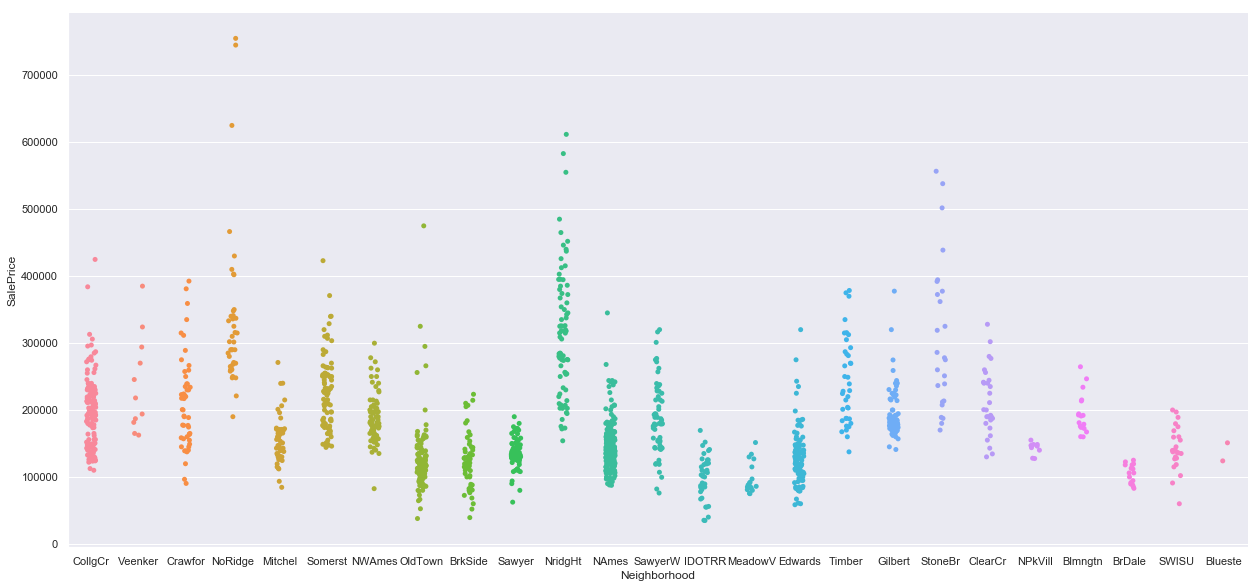

In [11]:
sns.catplot(x="Neighborhood", y="SalePrice", data=df, height=8.27, aspect=24/11.27)

As illustrated above, we can see that Nridge Ht is the most diverse neighbourhood, so is NoRidge and Stone Br. There are other neighbourhoods which have a pretty lower spectrum of sale prices and for individuals looking for a house on that price band, can choose amongst Mitchel, NWAmes, BrkSide, Sawyer, IDOTRR, MeadowV NPkVill, Blmngtn, BRDale, SWISU and Blueste.
On the analytical perspective, most of the prices from the training dataset can land anywhere for these neighbourhoods. We feel, they would not be highly influential in price prediction apart from determining extreme limits of the house prices. 

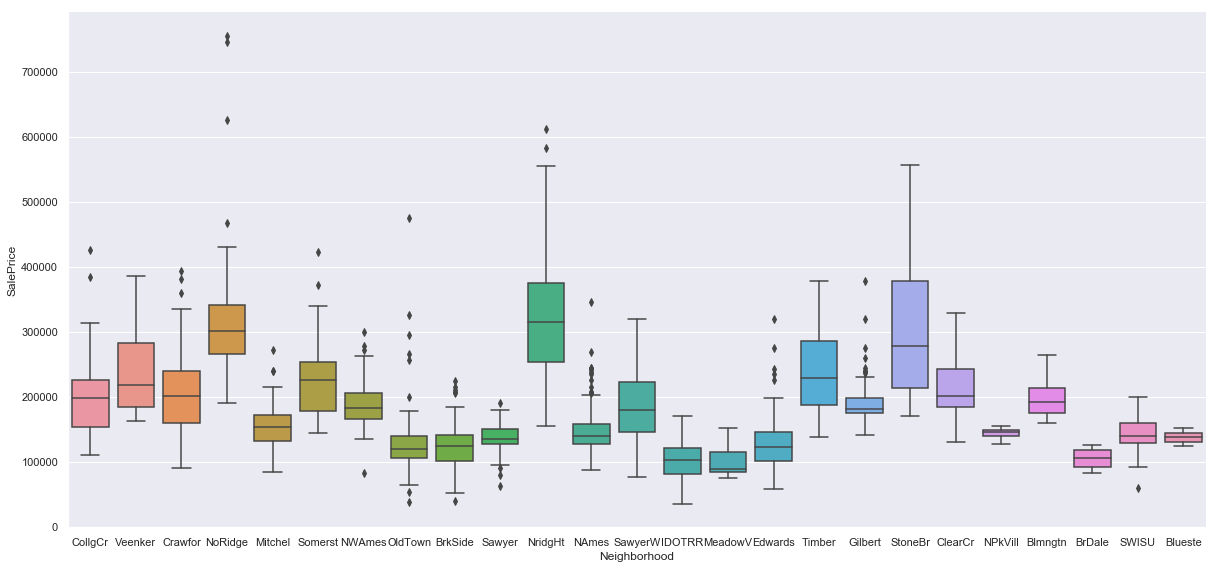

In [12]:
# Understanding via boxplot - The outliers are potentiallly reflective of 
# how few neighbourhoods can have a few expensive houses.
sns.catplot(x="Neighborhood", y="SalePrice", kind="box", data=df,height = 8,aspect=24/11.27)

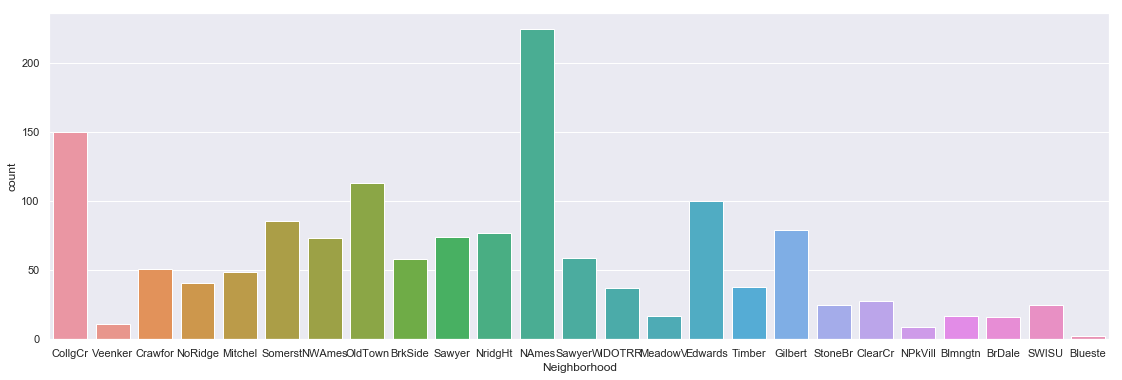

In [13]:
# Additional exploration of the count of houses in each neighbourhood to gain more perspective.

plt.figure(figsize=(19,6))
sns.countplot(x='Neighborhood', data=df)

In [14]:
display(df.pivot_table(
    index='Neighborhood',
    aggfunc={'OverallQual': 'mean'}
))

,OverallQual
Neighborhood,
Blmngtn,7.176471
Blueste,6.000000
BrDale,5.687500
BrkSide,5.051724
ClearCr,5.892857
CollgCr,6.640000
Crawfor,6.274510
Edwards,5.080000
Gilbert,6.556962


From the above result, we can see that the neighbourhood with more than 100 properties - NAmes, CollgCr, OldTown and Edwards are having lower overall quality and thus they fall on the lower spectrum of prices. 
NAmes : 5.36
CollgCr : 6.64
OldTown : 5.38
Edwards : 5.08

## Kitchen quality viz 

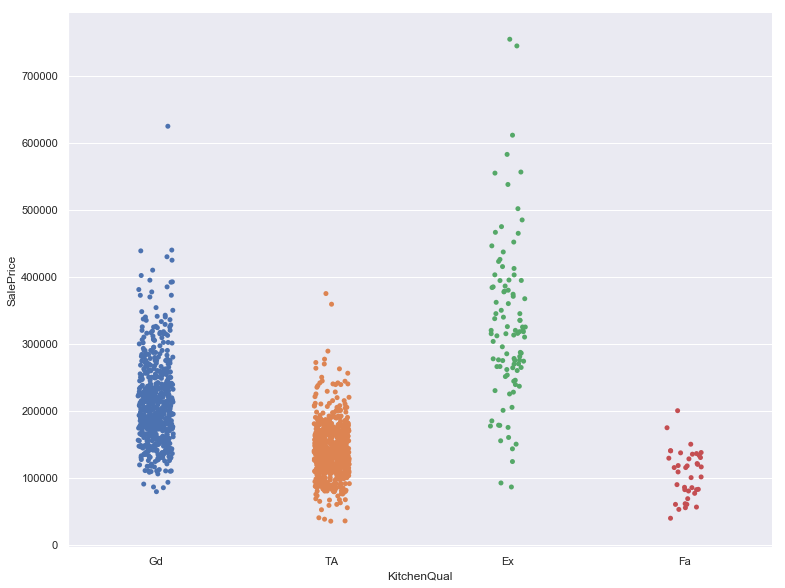

In [15]:
sns.catplot(x="KitchenQual", y="SalePrice", data=df, height=8.27, aspect=15/11.27, hue="KitchenQual", legend_out=True)

Firstly, there arent many houses with Execellent kitchen conditions and those which are, are on the higher spectrum of prices. Similarly, for Kitchens of "Fair" quality, have extremely lower prices. Apart from this, there is a reasonably significant segregation between prices of Good and TA quality. This could help in predicting brackets of house prices. 

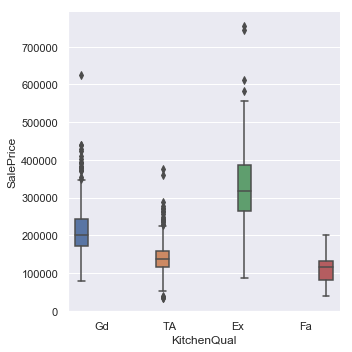

In [16]:
sns.catplot(x="KitchenQual", y="SalePrice", kind="box", data=df, hue="KitchenQual", legend_out=True)

## Organising data in a more categorical form via label encoding and transformation techniques to wave-off skewness in the data

In [17]:
#Convert 'CentralAir' yes/no to 1/0
df['CentralAir'] = df['CentralAir'].replace("N", 0).replace("Y", 1)

#Labelencoder to scale as numeric (1 to n) for other categories 
from sklearn.preprocessing import LabelEncoder
cols = ('ExterCond','HeatingQC', 'KitchenQual', 'BsmtFinType1', 'BldgType',
        'LotShape', 'PavedDrive', 'YrSold', 'YearBuilt', 'YearRemodAdd', 'ExterQual')

# Process columns and apply LabelEncoder to transform 
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(df[c].values)) 
    df[c] = lbl.transform(list(df[c].values))

# Lotfrontage should be int, not float (data type retained because we filled in NAs previously) Convert:
df.LotFrontage = df.LotFrontage.astype(int)

#Check data types
df.dtypes

MSSubClass       object
MSZoning         object
LotFrontage       int32
LotArea           int64
LotShape          int64
Neighborhood     object
BldgType          int64
HouseStyle       object
OverallQual       int64
OverallCond       int64
YearBuilt         int64
YearRemodAdd      int64
Exterior1st      object
ExterQual         int64
ExterCond         int64
Foundation       object
BsmtFinType1      int64
BsmtFinSF1        int64
TotalBsmtSF       int64
Heating          object
HeatingQC         int64
CentralAir        int64
GrLivArea         int64
BsmtFullBath      int64
BsmtHalfBath      int64
TotalFullBath     int64
TotalHalfBath     int64
FullBath          int64
HalfBath          int64
BedroomAbvGr      int64
KitchenAbvGr      int64
KitchenQual       int64
TotRmsAbvGrd      int64
Fireplaces        int64
GarageCars        int64
PavedDrive        int64
YrSold            int64
SaleCondition    object
SalePrice         int64
dtype: object

In [18]:
#First creating 2 new dataframes, d1 as all the predictors we are keeping, d2 as the target (price)
#  i.e.  dropped the bathroom columns for basement/above ground because we already have the total count

d1 = df[['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'LotShape', 'Neighborhood',
         'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 
        'ExterQual', 'Foundation', 'TotalBsmtSF',  'HeatingQC',  'GrLivArea', 'TotalFullBath', 
         'TotalHalfBath', 'KitchenQual', 'TotRmsAbvGrd', 
         'Fireplaces','YrSold', 'SaleCondition']]

d2 = df[['SalePrice']]

In [19]:
#SaleCondition - normal, bankrupt, family, etc. 
dummy_salecond = pd.get_dummies(d1["SaleCondition"],drop_first=True)

#MSZoning
dummy_zoning = pd.get_dummies(d1["MSZoning"],drop_first=True)

#Neighborhood
dummy_neighborhood = pd.get_dummies(d1["Neighborhood"],drop_first=True)

#HouseStyle
dummy_housestyle = pd.get_dummies(d1["HouseStyle"],drop_first=True)

#Exterior1st
#dummy_exterior = pd.get_dummies(d1["Exterior1st"],drop_first=True)

#Foundation
dummy_foundation = pd.get_dummies(d1["Foundation"],drop_first=True)

#Heating
#dummy_heating = pd.get_dummies(d1["Heating"],drop_first=True)

#MSSubClass
dummy_mssub = pd.get_dummies(d1["MSSubClass"],drop_first=True)


d1 = pd.concat([d1, dummy_salecond, dummy_zoning, dummy_neighborhood, dummy_housestyle, 
              # dummy_exterior, 
                dummy_foundation, 
                #dummy_heating, 
                dummy_mssub],axis=1)


In [20]:
# Remove original columns after one-hot completed (no longer needed)? But first column already dropped.
d1.drop(["HouseStyle",
         #"Heating",
         "SaleCondition", "MSZoning","Neighborhood", "HouseStyle", 
         #"Exterior1st", 
         "Foundation", "MSSubClass" ],axis=1,inplace=True)


# Dropping even more uncorrelated variables or avoid multicollinearity? Up to interpretation

In [21]:
d1.head()

,LotFrontage,LotArea,LotShape,BldgType,OverallQual,OverallCond,YearBuilt,YearRemodAdd,ExterQual,TotalBsmtSF,...,30,40,45,50,60,70,75,80,85,90
0,65,8450,3,0,7,5,104,53,2,856,...,0,0,0,0,1,0,0,0,0,0
1,80,9600,3,0,6,8,77,26,3,1262,...,0,0,0,0,0,0,0,0,0,0
2,68,11250,0,0,7,5,102,52,2,920,...,0,0,0,0,1,0,0,0,0,0
3,60,9550,0,0,7,5,19,20,3,756,...,0,0,0,0,0,1,0,0,0,0
4,84,14260,0,0,8,5,101,50,2,1145,...,0,0,0,0,1,0,0,0,0,0


In [22]:
attr = df.values
print (df.columns.values)

['MSSubClass' 'MSZoning' 'LotFrontage' 'LotArea' 'LotShape' 'Neighborhood'
 'BldgType' 'HouseStyle' 'OverallQual' 'OverallCond' 'YearBuilt'
 'YearRemodAdd' 'Exterior1st' 'ExterQual' 'ExterCond' 'Foundation'
 'BsmtFinType1' 'BsmtFinSF1' 'TotalBsmtSF' 'Heating' 'HeatingQC'
 'CentralAir' 'GrLivArea' 'BsmtFullBath' 'BsmtHalfBath' 'TotalFullBath'
 'TotalHalfBath' 'FullBath' 'HalfBath' 'BedroomAbvGr' 'KitchenAbvGr'
 'KitchenQual' 'TotRmsAbvGrd' 'Fireplaces' 'GarageCars' 'PavedDrive'
 'YrSold' 'SaleCondition' 'SalePrice']


## Correlation Matrix

At first, we place all the columns under correlation grid, and following is the grid with the most significant columns from the given dataset. These will be further refined on the basis of their correlation score.

,LotFrontage,LotArea,LotShape,Neighborhood,BldgType,HouseStyle,OverallQual,TotalBsmtSF,Heating,GrLivArea,...,BsmtHalfBath,TotalFullBath,TotalHalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,YrSold,SaleCondition,SalePrice
LotFrontage,1.000000,0.186703,0.127306,0.060486,0.164770,-0.023001,-0.061876,0.112314,-0.038371,0.066337,...,-0.041837,-0.132053,0.005237,0.076408,-0.016066,0.049972,0.075481,-0.007469,0.072974,0.098717
LotArea,0.186703,1.000000,0.194447,0.026075,-0.006009,0.009529,-0.000342,0.392609,-0.022760,0.415244,...,-0.009707,-0.095766,-0.017127,-0.033161,-0.020927,0.008135,0.055590,-0.021163,-0.036398,0.372106
LotShape,0.127306,0.194447,1.000000,-0.013295,-0.134373,-0.067647,-0.112016,0.058547,-0.043320,-0.006340,...,0.057729,-0.157591,-0.108853,-0.103780,-0.078131,-0.014921,0.202019,-0.019939,-0.004773,0.067894
Neighborhood,0.060486,0.026075,-0.013295,1.000000,0.184198,0.060100,0.108956,-0.029731,0.000671,0.031872,...,0.036803,0.068441,0.030459,0.134788,-0.004264,0.015572,0.040634,0.042444,0.007101,-0.057396
BldgType,0.164770,-0.006009,-0.134373,0.184198,1.000000,-0.058511,-0.062145,0.002551,-0.004899,-0.083607,...,-0.008976,-0.097929,0.044348,0.300707,0.221372,0.169121,-0.116308,0.010059,0.040365,-0.015710
HouseStyle,-0.023001,0.009529,-0.067647,0.060100,-0.058511,1.000000,0.079401,-0.001984,0.063811,0.010282,...,0.088545,0.095265,0.195336,0.102687,0.057107,0.090369,-0.029972,-0.025099,-0.029049,-0.071355
OverallQual,-0.061876,-0.000342,-0.112016,0.108956,-0.062145,0.079401,1.000000,-0.094579,0.134867,-0.023274,...,-0.024133,0.272369,0.201356,0.153802,0.139640,0.232965,-0.196838,0.037375,0.007942,0.029577
TotalBsmtSF,0.112314,0.392609,0.058547,-0.029731,0.002551,-0.001984,-0.094579,1.000000,-0.066236,0.469973,...,-0.019705,-0.148394,-0.070458,-0.052714,-0.037013,-0.065757,0.140253,0.000377,0.054604,0.274070
Heating,-0.038371,-0.022760,-0.043320,0.000671,-0.004899,0.063811,0.134867,-0.066236,1.000000,-0.000065,...,-0.011996,0.069319,0.049044,0.089076,0.079056,0.015799,-0.055357,-0.014044,-0.032650,0.015155
GrLivArea,0.066337,0.415244,-0.006340,0.031872,-0.083607,0.010282,-0.023274,0.469973,-0.000065,1.000000,...,-0.008761,-0.054489,-0.076473,-0.000724,-0.025233,0.022245,0.118768,0.011380,0.019947,0.270148


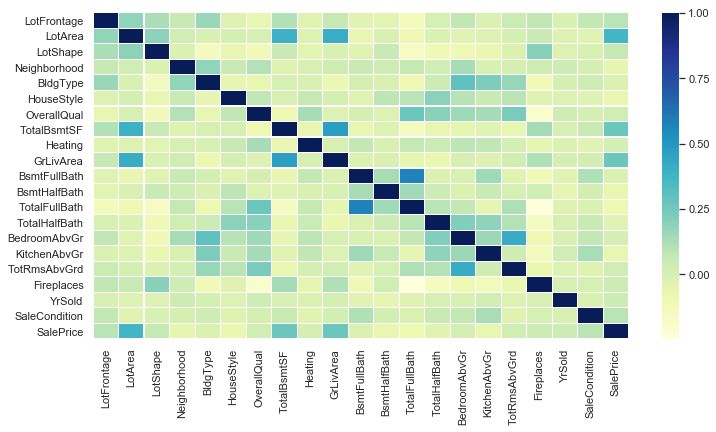

In [23]:
plt.figure(figsize=(12, 6))
corr = df[['LotFrontage', 'LotArea' ,'LotShape', 'Neighborhood',
 'BldgType', 'HouseStyle', 'OverallQual' ,
 'TotalBsmtSF' ,'Heating', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath' ,'TotalFullBath',
 'TotalHalfBath','BedroomAbvGr', 'KitchenAbvGr',
 'TotRmsAbvGrd', 'Fireplaces', 
 'YrSold', 'SaleCondition', 'SalePrice']].apply(lambda x: pd.factorize(x)[0]).corr()
display(corr)
ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, linewidths=.2, cmap="YlGnBu")

Further refining column set to significant correlated factors that will potentially be useful in classifying building type

,LotArea,BldgType,HouseStyle,OverallQual,TotalBsmtSF,Heating,GrLivArea,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,YrSold,SaleCondition,SalePrice
LotArea,1.000000,-0.006009,0.009529,-0.000342,0.392609,-0.022760,0.415244,-0.033161,0.008135,0.055590,-0.021163,-0.036398,0.372106
BldgType,-0.006009,1.000000,-0.058511,-0.062145,0.002551,-0.004899,-0.083607,0.300707,0.169121,-0.116308,0.010059,0.040365,-0.015710
HouseStyle,0.009529,-0.058511,1.000000,0.079401,-0.001984,0.063811,0.010282,0.102687,0.090369,-0.029972,-0.025099,-0.029049,-0.071355
OverallQual,-0.000342,-0.062145,0.079401,1.000000,-0.094579,0.134867,-0.023274,0.153802,0.232965,-0.196838,0.037375,0.007942,0.029577
TotalBsmtSF,0.392609,0.002551,-0.001984,-0.094579,1.000000,-0.066236,0.469973,-0.052714,-0.065757,0.140253,0.000377,0.054604,0.274070
Heating,-0.022760,-0.004899,0.063811,0.134867,-0.066236,1.000000,-0.000065,0.089076,0.015799,-0.055357,-0.014044,-0.032650,0.015155
GrLivArea,0.415244,-0.083607,0.010282,-0.023274,0.469973,-0.000065,1.000000,-0.000724,0.022245,0.118768,0.011380,0.019947,0.270148
BedroomAbvGr,-0.033161,0.300707,0.102687,0.153802,-0.052714,0.089076,-0.000724,1.000000,0.416805,-0.100175,-0.004841,0.072122,0.013614
TotRmsAbvGrd,0.008135,0.169121,0.090369,0.232965,-0.065757,0.015799,0.022245,0.416805,1.000000,-0.076834,-0.023094,-0.028328,0.030685
Fireplaces,0.055590,-0.116308,-0.029972,-0.196838,0.140253,-0.055357,0.118768,-0.100175,-0.076834,1.000000,-0.000290,0.004490,0.043633


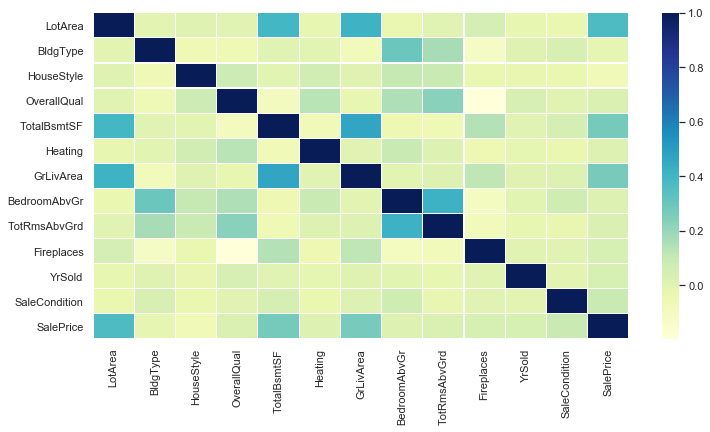

In [24]:
plt.figure(figsize=(12, 6))
corr = df[[ 'LotArea','BldgType', 'HouseStyle', 'OverallQual' ,
 'TotalBsmtSF' ,'Heating', 'GrLivArea','BedroomAbvGr',
 'TotRmsAbvGrd', 'Fireplaces', 
 'YrSold', 'SaleCondition', 'SalePrice']].apply(lambda x: pd.factorize(x)[0]).corr()
display(corr)
ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, linewidths=.2, cmap="YlGnBu")  

Drawing visualisation on these variables

In [25]:
newdata = df[[ 'LotArea','BldgType', 'HouseStyle', 'OverallQual' ,
 'TotalBsmtSF' ,'Heating', 'GrLivArea','BedroomAbvGr',
 'TotRmsAbvGrd', 'Fireplaces', 
 'YrSold', 'SaleCondition', 'SalePrice']]

newdata.head()

,LotArea,BldgType,HouseStyle,OverallQual,TotalBsmtSF,Heating,GrLivArea,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,YrSold,SaleCondition,SalePrice
0,8450,0,2Story,7,856,GasA,1710,3,8,0,2,Normal,208500
1,9600,0,1Story,6,1262,GasA,1262,3,6,1,1,Normal,181500
2,11250,0,2Story,7,920,GasA,1786,3,6,1,2,Normal,223500
3,9550,0,2Story,7,756,GasA,1717,3,7,1,0,Abnorml,140000
4,14260,0,2Story,8,1145,GasA,2198,4,9,1,2,Normal,250000


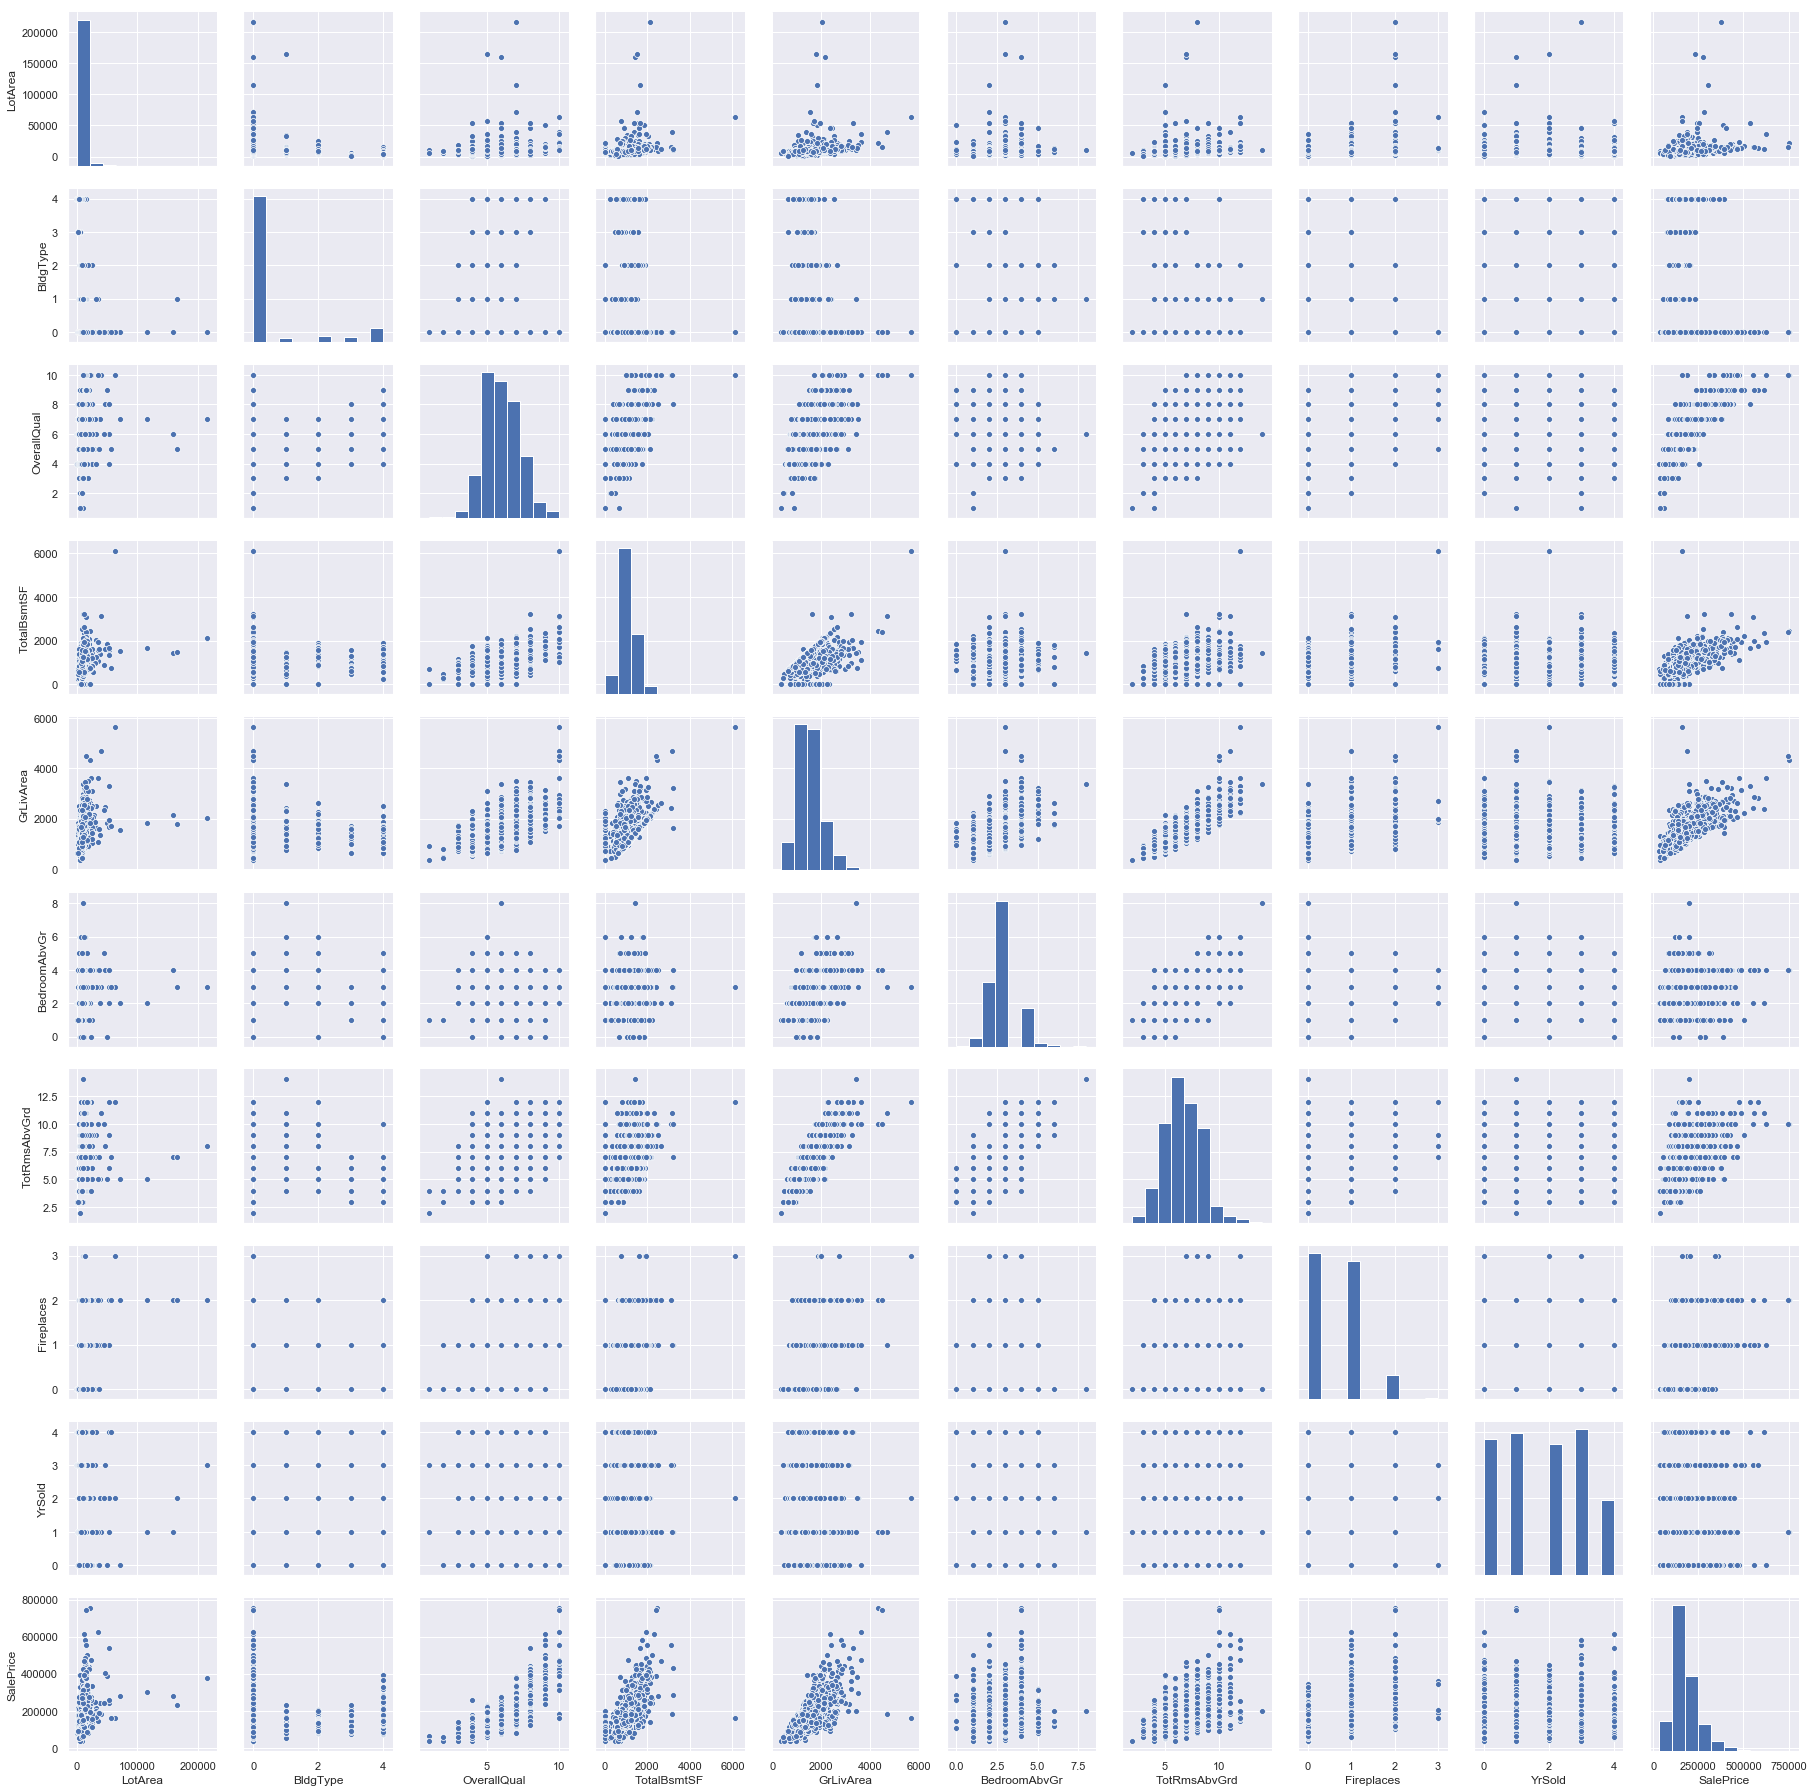

In [26]:
sns.pairplot(newdata, height=2.5)

## kNN Classification

Hand picking releavnt columns to set up dataset for kNN classification modelling.

In [27]:
d1 = df[[ 'LotArea','SalePrice', 'HouseStyle',
 'TotalBsmtSF' , 'GrLivArea','BedroomAbvGr',
 'TotRmsAbvGrd']]

d2 = df[['BldgType']]

In [28]:
d1.head()

,LotArea,SalePrice,HouseStyle,TotalBsmtSF,GrLivArea,BedroomAbvGr,TotRmsAbvGrd
0,8450,208500,2Story,856,1710,3,8
1,9600,181500,1Story,1262,1262,3,6
2,11250,223500,2Story,920,1786,3,6
3,9550,140000,2Story,756,1717,3,7
4,14260,250000,2Story,1145,2198,4,9


In [29]:
#Converting categorical variables to dummy variables
dummy_housestyle = pd.get_dummies(d1["HouseStyle"],drop_first=True)
d1 = pd.concat([d1, dummy_housestyle],axis=1)

d1.drop(["HouseStyle"],axis=1,inplace=True)

In [30]:
d1.head()

,LotArea,SalePrice,TotalBsmtSF,GrLivArea,BedroomAbvGr,TotRmsAbvGrd,1.5Unf,1Story,2.5Fin,2.5Unf,2Story,SFoyer,SLvl
0,8450,208500,856,1710,3,8,0,0,0,0,1,0,0
1,9600,181500,1262,1262,3,6,0,1,0,0,0,0,0
2,11250,223500,920,1786,3,6,0,0,0,0,1,0,0
3,9550,140000,756,1717,3,7,0,0,0,0,1,0,0
4,14260,250000,1145,2198,4,9,0,0,0,0,1,0,0


In [31]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(d1, d2, test_size=0.20)

In [32]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)  

C:\Users\deeks\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\deeks\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  """
C:\Users\deeks\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  


In [33]:
from sklearn.neighbors import KNeighborsClassifier  
classifier = KNeighborsClassifier(n_neighbors=5)  
classifier.fit(X_train, y_train)  

C:\Users\deeks\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [34]:
y_pred = classifier.predict(X_test)  

In [35]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))  

[[235   0   0   0   6]
 [  3   0   0   0   0]
 [  5   1   8   0   0]
 [  1   0   0   6   3]
 [  5   0   0   3  16]]
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       241
           1       0.00      0.00      0.00         3
           2       1.00      0.57      0.73        14
           3       0.67      0.60      0.63        10
           4       0.64      0.67      0.65        24

   micro avg       0.91      0.91      0.91       292
   macro avg       0.65      0.56      0.59       292
weighted avg       0.90      0.91      0.90       292



Weighted accuracy shows the building type will be predicted with 87% accuracy. This can be used to present an optimum choice of property to a customer who has an approaximate idea of what attributed they are looking for in a property.

## Clustering

Our goal is to cluster residents in their economic profile by understanding their house size and the amount that it cost them. We are doing this with the idea that it will help understand the economic backgrounds associated with different groups of house sizes and prices.

In [36]:
from sklearn.cluster import KMeans
sserror= {}

In [37]:
##### load the data
house_data = pd.read_csv('Shortlisted Train - train.csv')
#cut the data
house_data.drop(house_data.iloc[:, 0:22], inplace=True, axis=1)
#display(house_data)
#house_data.drop(house_data.iloc[:, 5:40], inplace=True, axis=1)
house_data.drop(house_data.iloc[:, 1:16], inplace=True, axis=1)
house_data.head(5)

,GrLivArea,SalePrice
0,1710,208500
1,1262,181500
2,1786,223500
3,1717,140000
4,2198,250000


Determining number of clusters that would be optimum for this dataset

### Agglomerative Clustering

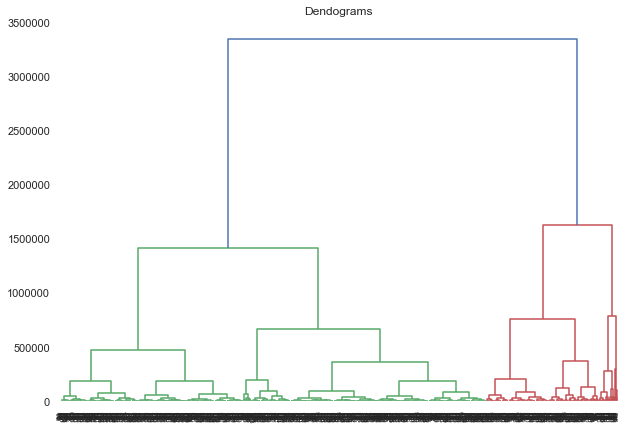

In [38]:
# TODO

import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))  
plt.title("Dendograms")  
dend = shc.dendrogram(shc.linkage(house_data, method='ward'))

As cluster value = 4 is the knee point in the graph illustrated, we will be going forward to break 4 clusters of the given set of attributes.

Text(0.5, 0, 'Gr Liv Area')

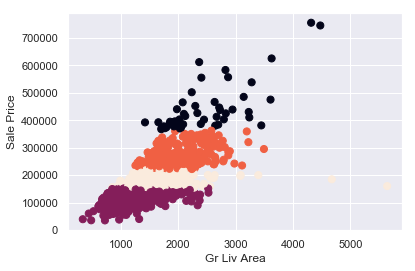

In [39]:
l = len(house_data.iloc[:,0])

from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')  
y_ward = hc.fit_predict(house_data)  

plt.scatter(house_data.iloc[:, 0], house_data.iloc[:, 1], c=y_ward, s=50)
plt.ylabel("Sale Price")
plt.xlabel("Gr Liv Area")

Performance measures:

Silhouette Coefficient score evaluates the performance of the model by calculating 2 types of distances:
1. The mean distance between a sample and all other points in the same class.
2. The mean distance between a sample and all other points in the next nearest cluster.

A higher score reflects a better model.

In [41]:
from sklearn import metrics
from sklearn.metrics import pairwise_distances

labels = hc.labels_
metrics.silhouette_score(house_data, labels, metric='euclidean')

0.535323564593735

### KMeans Clustering

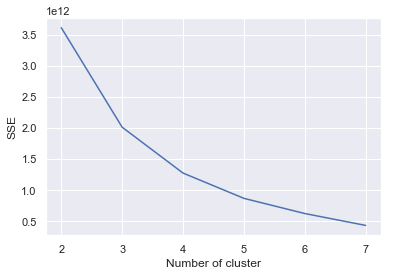

In [42]:
# TODO
for k in range(2,8):
    kmeans = KMeans(n_clusters=k, random_state=0)
    clusters = kmeans.fit(house_data)
    sserror[k]=clusters.inertia_
plt.figure()
plt.plot(list(sserror.keys()), list(sserror.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

As cluster value = 4 is the knee point in the graph illustrated, we will be going forward to break 4 clusters of the given set of attributes.

Text(0.5, 0, 'Gr Liv Area')

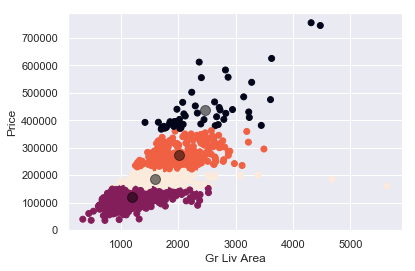

In [43]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(house_data)
y_kmeans = kmeans.predict(house_data)

plt.scatter(house_data['GrLivArea'], house_data['SalePrice'], c=y_ward)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=0.5)
plt.ylabel("Price")
plt.xlabel("Gr Liv Area")

In [44]:
labels = kmeans.labels_
metrics.silhouette_score(house_data, labels, metric='euclidean')

0.5430553381933146